In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('Test.csv')

In [5]:
df

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Contract,Paperless Billing,Monthly Charges,Total Charges,Churn Value,...,Payment Method_Electronic check,Payment Method_Mailed check,Churn Reason Combined_Billing & Pricing Issues,Churn Reason Combined_Competitor Advantage,Churn Reason Combined_Moved,Churn Reason Combined_Network Issues,Churn Reason Combined_Product dissatisfaction,Churn Reason Combined_Service Issues,Churn Reason Combined_Support Issues,Churn Reason Combined_Unknown
0,0,0,1,11,1,0,1,97.85,1105.40,1,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,61,1,2,0,25.30,1554.90,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,1,25,1,1,0,53.65,1355.45,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,13,0,0,1,35.10,446.10,1,...,1,0,0,0,0,0,0,1,0,0
4,0,1,1,53,1,2,0,25.55,1336.10,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,0,0,0,10,1,0,0,20.00,198.70,0,...,0,0,0,0,0,0,0,0,0,1
2032,0,0,0,38,1,0,0,68.15,2656.30,0,...,0,0,0,0,0,0,0,0,0,1
2033,0,1,0,71,0,1,0,66.80,4689.15,0,...,0,0,0,0,0,0,0,0,0,1
2034,0,0,1,62,1,2,1,24.40,1413.00,0,...,0,1,0,0,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 41 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Senior Citizen                                  2036 non-null   int64  
 1   Partner                                         2036 non-null   int64  
 2   Dependents                                      2036 non-null   int64  
 3   Tenure Months                                   2036 non-null   int64  
 4   Phone Service                                   2036 non-null   int64  
 5   Contract                                        2036 non-null   int64  
 6   Paperless Billing                               2036 non-null   int64  
 7   Monthly Charges                                 2036 non-null   float64
 8   Total Charges                                   2036 non-null   float64
 9   Churn Value                              

In [7]:
X = df.drop(columns=["Churn Value","Churn Reason"])  # Drop target column
y = df["Churn Value"]  # Extract target variable

In [10]:
import joblib
scaler = joblib.load("scaler.pkl")
X_scaled = scaler.transform(X)

In [12]:
# Load the saved model
log_reg_loaded = joblib.load("logistic_regression_model.pkl")

# Predict on unseen data
y_pred = log_reg_loaded.predict(X_scaled)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model_name, y_true, y_pred):
    print(f"\n📊 Performance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    
    # Plot Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


📊 Performance Metrics for Logistic Regression (Unseen Data):
Accuracy: 0.9897
Precision: 0.9921
Recall: 0.9674
F1-score: 0.9796


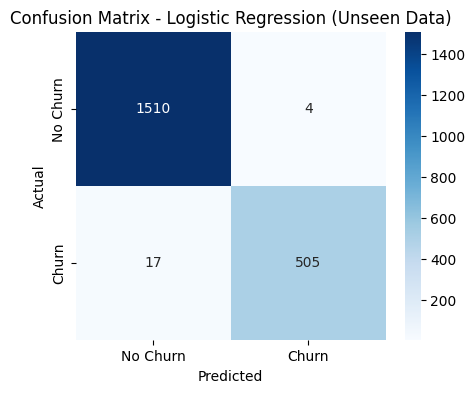

In [15]:
evaluate_model("Logistic Regression (Unseen Data)", y, y_pred)